## Vancouver Crime Data

### Introduction:


### Preliminary Results:

Loading Data into R

In [313]:
# installing required packages 

install.packages("skimr")
install.packages("GGally")
install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")
install.packages("ggplot2")
install.packages("RCurl")

# installing libraries

library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)
library(ggplot2)
library(RCurl)

Warning message:
"package 'skimr' is in use and will not be installed"
Warning message:
"package 'GGally' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'repr' is in use and will not be installed"
Warning message:
"package 'tidymodels' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'RCurl' is in use and will not be installed"


In [314]:
# reading data from github

url <- "https://raw.githubusercontent.com/Utsav02/VancouverCrimeSTAT201/main/crimedata_csv_AllNeighbourhoods_AllYears.csv"
vancouver_crime <- read.csv(url)
vancouver_crime

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
Theft of Vehicle,2003,9,24,21,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
Theft of Vehicle,2004,4,30,19,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
Theft of Vehicle,2006,12,11,23,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
Theft of Vehicle,2017,12,3,20,30,29XX SASAMAT ST,West Point Grey,484782.1,5456498
Theft of Vehicle,2004,8,26,0,0,29XX SE MARINE DR,Killarney,496545.8,5450538
Theft of Vehicle,2004,8,27,4,30,29XX SE MARINE DR,Killarney,496545.8,5450538
Theft of Vehicle,2006,1,22,9,30,29XX SE MARINE DR,Killarney,496545.8,5450538
Theft of Vehicle,2006,1,14,7,0,29XX SEMLIN DR,Kensington-Cedar Cottage,495344.4,5456207
Theft of Vehicle,2020,5,18,14,0,29XX SEMLIN DR,Kensington-Cedar Cottage,495344.4,5456208


Tidying data according to our use

In [315]:
# not selecting 2022 as it is the present year
vancouver_crime <- vancouver_crime %>%
filter(YEAR != 2022 & YEAR >= 2011)

# crimes that do not have any neighbourhoods mentioned
vancouver_crime[vancouver_crime == ""] <- "Neighbourhood Missing"
head(vancouver_crime)
tail(vancouver_crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2017,12,3,20,30,29XX SASAMAT ST,West Point Grey,484782.1,5456498
2,Theft of Vehicle,2020,5,18,14,0,29XX SEMLIN DR,Kensington-Cedar Cottage,495344.4,5456208
3,Theft of Vehicle,2017,11,29,20,0,29XX SKEENA ST,Renfrew-Collingwood,497919.2,5456148
4,Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
5,Theft of Vehicle,2015,11,11,13,30,29XX SPRUCE ST,Fairview,490608.6,5456298
6,Theft of Vehicle,2012,1,28,0,30,29XX TRINITY ST,Hastings-Sunrise,496803.9,5459658


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
434885,Theft of Vehicle,2015,11,7,21,30,29XX QUEBEC ST,Mount Pleasant,492496.9,5456202
434886,Theft of Vehicle,2017,5,4,9,30,29XX QUEBEC ST,Mount Pleasant,492496.9,5456202
434887,Theft of Vehicle,2016,10,27,22,0,29XX QUEBEC ST,Mount Pleasant,492499.2,5456285
434888,Theft of Vehicle,2014,6,29,1,0,29XX ROSEMONT DR,Killarney,496572.4,5451619
434889,Theft of Vehicle,2011,12,26,0,0,29XX RUPERT ST,Renfrew-Collingwood,497550.7,5456104
434890,Theft of Vehicle,2017,10,21,23,0,29XX RUPERT ST,Renfrew-Collingwood,497550.7,5456118


List of all Neighbourhoods present in data and their total crimes reported in past 20 years

In [316]:
neighbourhood_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD) %>%
summarize(Count = n())

neighbourhood_grouped


NEIGHBOURHOOD,Count
<chr>,<int>
Arbutus Ridge,4335
Central Business District,126026
Dunbar-Southlands,5630
Fairview,24617
Grandview-Woodland,23358
Hastings-Sunrise,14695
Kensington-Cedar Cottage,19584
Kerrisdale,5489
Killarney,7380


List of all Crimes and their count in the past 20 years

In [317]:
crime_grouped <- vancouver_crime %>%
group_by(TYPE) %>%
summarize(Count = n()) %>%
mutate(proportion = (Count / sum(Count)) * 100)

crime_grouped


TYPE,Count,proportion
<chr>,<int>,<dbl>
Break and Enter Commercial,24165,5.55657753
Break and Enter Residential/Other,29408,6.76216974
Homicide,147,0.03380165
Mischief,55023,12.65216492
Offence Against a Person,38136,8.76911403
Other Theft,115723,26.60971740
Theft from Vehicle,120242,27.64883074
Theft of Bicycle,23558,5.41700200
Theft of Vehicle,13129,3.01892433


Neighbourhood and Year grouped

In [318]:
neighbourhood_year_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD, YEAR) %>%
summarize(Count = n())

head(neighbourhood_year_grouped)


`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,YEAR,Count
<chr>,<int>,<int>
Arbutus Ridge,2011,354
Arbutus Ridge,2012,405
Arbutus Ridge,2013,363
Arbutus Ridge,2014,467
Arbutus Ridge,2015,438
Arbutus Ridge,2016,491


Finally, after analyzing all variables and values, to answer our question we select neighbourhoods and their respect annual crime count 

In [319]:
crime_data_tidy <- pivot_wider(neighbourhood_year_grouped,
  names_from = NEIGHBOURHOOD,
  values_from = Count
)
crime_data_tidy

my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(crime_data_tidy) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)

summary_df <- summary_df[-1,]
summary_df

YEAR,Arbutus Ridge,Central Business District,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Stanley Park,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2011,354,9071,555,1975,1944,1313,1665,480,657,...,1897,858,408,333,231,2146,1101,810,2884,397
2012,405,8846,626,2284,1970,1345,1640,611,796,...,1911,924,430,361,249,2216,1256,719,2850,403
2013,363,9665,453,2094,2211,1140,2005,420,640,...,1752,1037,331,340,338,2162,1135,731,3085,330
2014,467,10532,536,2580,2133,1183,2067,486,722,...,2011,982,424,497,255,2457,1076,743,3392,439
2015,438,11265,625,2468,2180,1292,1859,550,690,...,1975,984,437,483,269,2512,1042,731,3506,441
2016,491,13364,472,2416,2433,1400,1910,546,627,...,2088,1114,474,434,199,2918,1189,723,3946,457
2017,430,13386,519,2168,2402,1436,1691,473,720,...,2354,1008,490,400,210,2945,1037,802,3825,465
2018,367,14362,519,2231,2230,1506,1698,506,684,...,2123,1060,474,360,200,3100,1166,735,3874,420
2019,365,16063,488,2677,2331,1621,1933,521,733,...,2169,1204,380,496,239,3407,1296,763,4216,453


skim_variable,n_missing,complete_rate,numeric.median,numeric.mean,numeric.sd,numeric.min,numeric.max
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
Arbutus Ridge,0,1,370,394.090909,58.888801,285,491
Central Business District,0,1,10532,11456.909091,2455.731111,8846,16063
Dunbar-Southlands,0,1,519,511.818182,82.127728,329,626
Fairview,0,1,2231,2237.909091,303.817200,1589,2677
Grandview-Woodland,0,1,2180,2123.454545,248.695542,1585,2433
Hastings-Sunrise,0,1,1313,1335.909091,147.610606,1140,1621
Kensington-Cedar Cottage,0,1,1698,1780.363636,185.684826,1460,2067
Kerrisdale,0,1,486,499.000000,55.519366,420,611
Killarney,0,1,684,670.909091,75.510866,522,796


Percentage of crime that happens in each neighbourhood compared to total crime count in the city? (need to change wording)

In [320]:
proportions_neighbourhood <- NeighbourhoodGrouped %>%
    mutate(proportion = (Count / sum(Count)))


proportions_neighbourhood


proportions_yearly <- vancouver_crime %>%
    group_by(YEAR) %>%
    summarise(Count = n()) %>%
    mutate(proportion = (Count / sum(Count)))
proportions_yearly



NEIGHBOURHOOD,Count,proportion
<chr>,<int>,<dbl>
Arbutus Ridge,8812,0.0108162912
Central Business District,216336,0.2655416676
Dunbar-Southlands,10821,0.0132822387
Fairview,50651,0.0621715804
Grandview-Woodland,46382,0.0569315954
Hastings-Sunrise,28588,0.0350903465
Kensington-Cedar Cottage,38840,0.0476741660
Kerrisdale,10827,0.0132896034
Killarney,15497,0.0190217958


YEAR,Count,proportion
<int>,<int>,<dbl>
2011,34435,0.07918094
2012,35570,0.08179080
2013,35862,0.08246223
2014,39264,0.09028490
2015,40265,0.09258663
2016,44129,0.10147164
2017,43210,0.09935846
2018,44308,0.10188323
2019,48315,0.11109706


Visualizing Data 

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


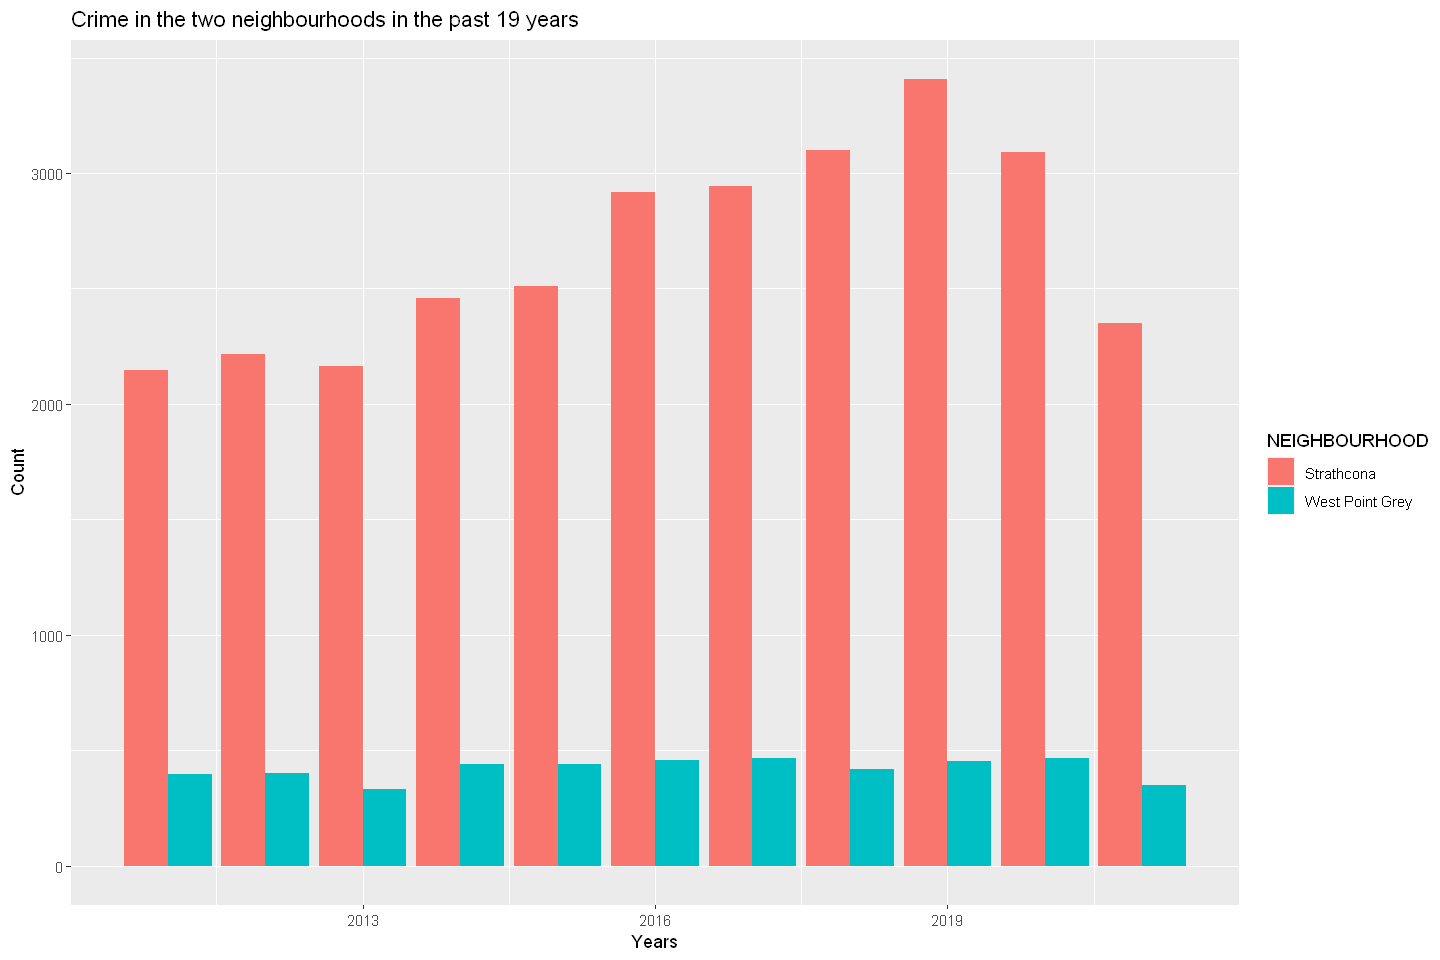

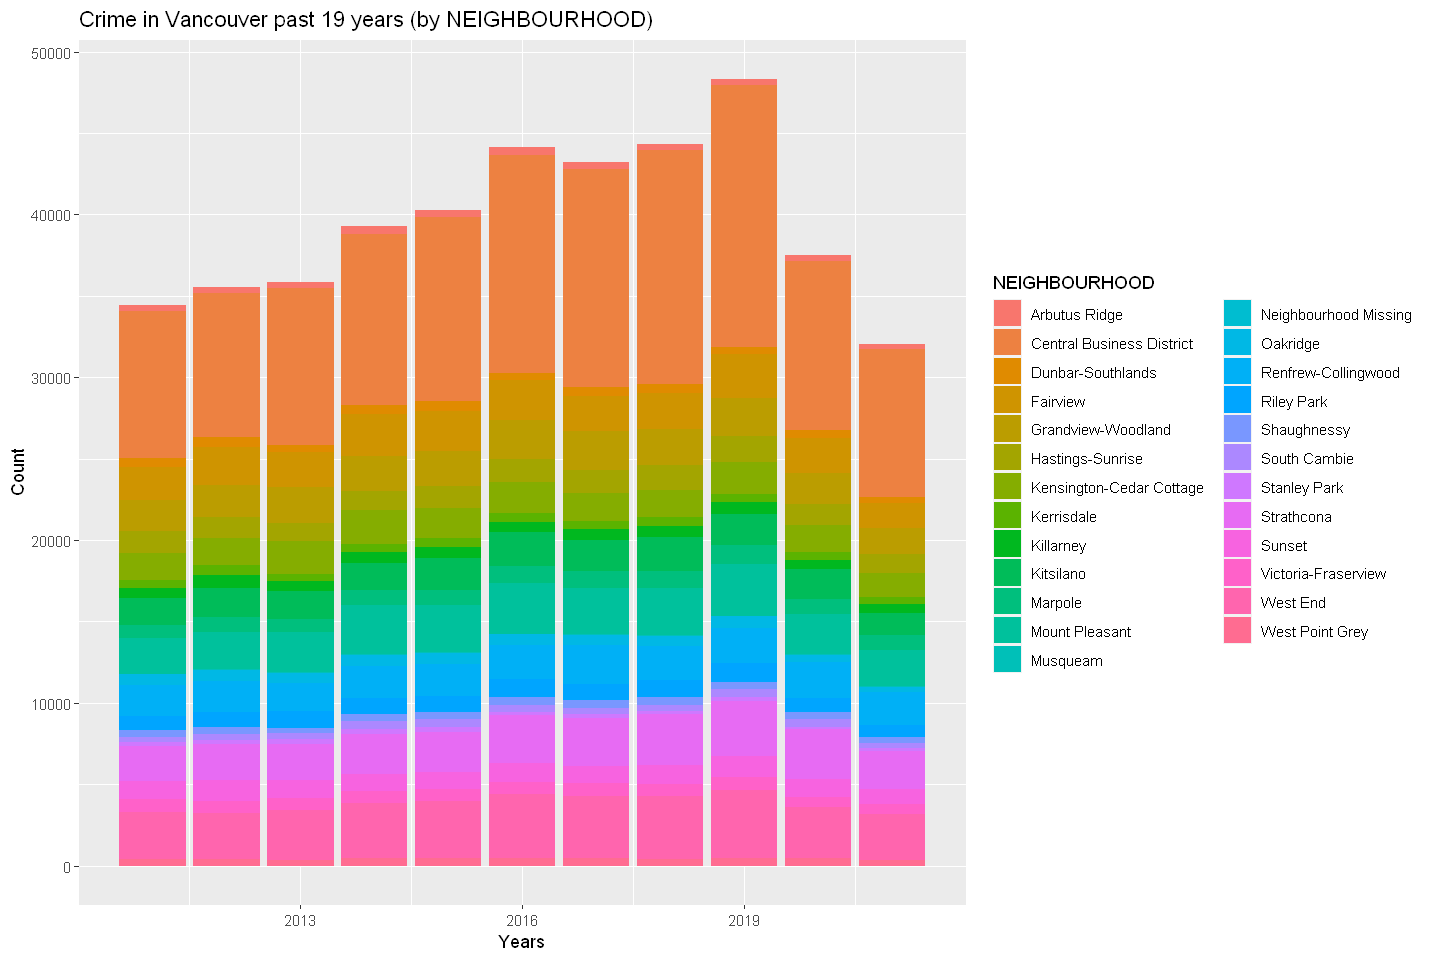

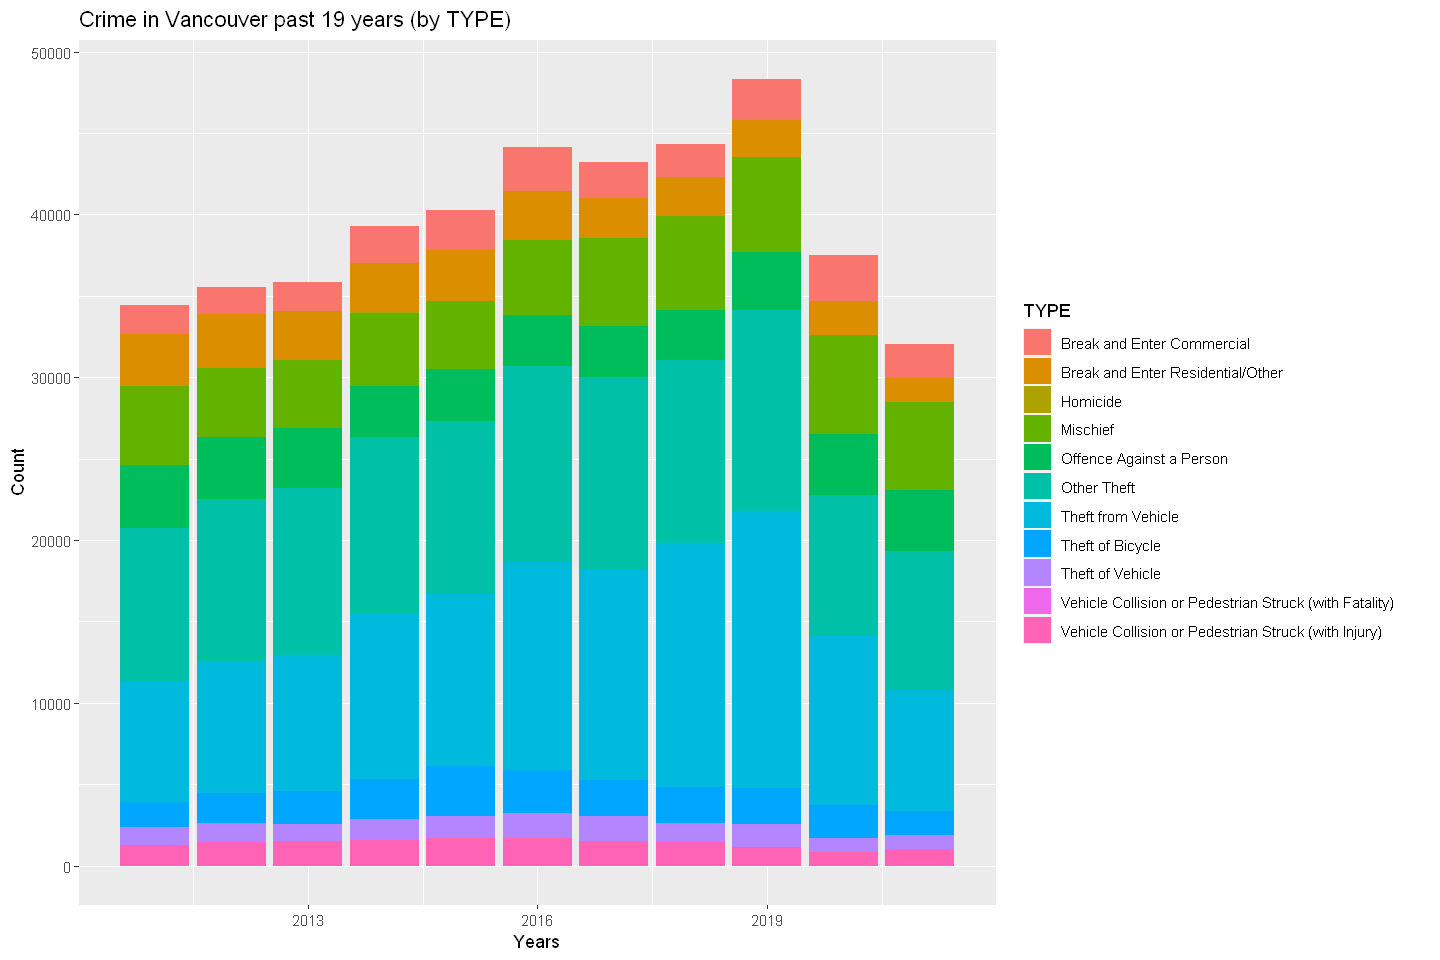

In [321]:
compare_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "West Point Grey") %>%
group_by(YEAR, NEIGHBOURHOOD) %>%
summarise(Count = n())



westpoint_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West Point Grey") %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n())

plot_1 <- compare_crime %>%
ggplot(aes(x = YEAR, y = Count, fill = NEIGHBOURHOOD)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "Years", title = "Crime in the two neighbourhoods in the past 19 years")


plot_2 <- vancouver_crime %>%
group_by(YEAR, NEIGHBOURHOOD) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = NEIGHBOURHOOD)) +
geom_bar(stat = "identity") +
labs(title = "Crime in Vancouver past 19 years (by NEIGHBOURHOOD)", x = "Years")

plot_3 <- vancouver_crime %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity") +
labs(title = "Crime in Vancouver past 19 years (by TYPE)", x = "Years")


options(repr.plot.width = 12, repr.plot.height= 8)

plot_1
plot_2
plot_3



Point Estimates Considered:

In [322]:
# rich neighbourhood selected = West Point Grey
# poor neighbourhood selected = Strathcona

proportions_selected <- proportions_neighbourhood %>%
    filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "West Point Grey")


proportions_selected

total <- sum(neighbourhood_grouped$Count)



NEIGHBOURHOOD,Count,proportion
<chr>,<int>,<dbl>
Strathcona,51711,0.06347268
West Point Grey,9107,0.01117839
